# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 604


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")


    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        response = requests.get(city_url)
        response.raise_for_status()  

        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Extract weather information from the API response
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Convert the city_data list into a DataFrame (if desired)
        city_data_df = pd.DataFrame(city_data)


        # Append the City information into city_data list
        city_data.append({
            "City": city,
            "Lat": city_weather["coord"]["lat"],
            "Lng": city_weather["coord"]["lon"],
            "Max Temp": city_weather["main"]["temp_max"],
            "Humidity": city_weather["main"]["humidity"],
            "Cloudiness": city_weather["clouds"]["all"],
            "Wind Speed": city_weather["wind"]["speed"],
            "Country": city_weather["sys"]["country"],
            "Date": city_weather["dt"]
        })

    # If an error is experienced, skip the city
    except:
        print(f"City {city} not found. Skipping...")
        pass

    # Pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


# Ensure data exists before plotting
if not city_data_df.empty:
    print("DataFrame loaded successfully:")
    print(city_data_df.head())
    

# Show Record Count
print(city_data_df.count())

# Export the City_Data into a CSV
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

 # Plot: Latitude vs. Max Temp
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", alpha=0.75,
                c=city_data_df["Max Temp"], cmap="coolwarm")
plt.title("City Latitude vs. Max Temperature (°C)", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Max Temperature (°C)", fontsize=12)
plt.grid(True, linestyle="--", color="gray", alpha=0.5)
plt.colorbar(label="Max Temperature (°C)")
plt.savefig("output_data/Fig1.png")
plt.show()


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | bredasdorp
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | tash-kumyr
Processing Record 6 of Set 1 | casino
Processing Record 7 of Set 1 | tiksi
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | daru
Processing Record 10 of Set 1 | korkut


KeyboardInterrupt: 

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          10
Lat           10
Lng           10
Max Temp      10
Humidity      10
Cloudiness    10
Wind Speed    10
Country       10
Date          10
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,5.50,81,58,14.26,TF,1738114904
1,waitangi,-43.9535,-176.5597,14.01,67,6,7.50,NZ,1738114771
2,bredasdorp,-34.5322,20.0403,20.61,94,89,2.40,ZA,1738114907
3,ushuaia,-54.8000,-68.3000,13.81,58,75,2.57,AR,1738114908
4,tash-kumyr,41.3461,72.2171,-1.21,74,100,1.29,KG,1738114909


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,5.50,81,58,14.26,TF,1738114904
1,waitangi,-43.9535,-176.5597,14.01,67,6,7.50,NZ,1738114771
2,bredasdorp,-34.5322,20.0403,20.61,94,89,2.40,ZA,1738114907
3,ushuaia,-54.8000,-68.3000,13.81,58,75,2.57,AR,1738114908
4,tash-kumyr,41.3461,72.2171,-1.21,74,100,1.29,KG,1738114909


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

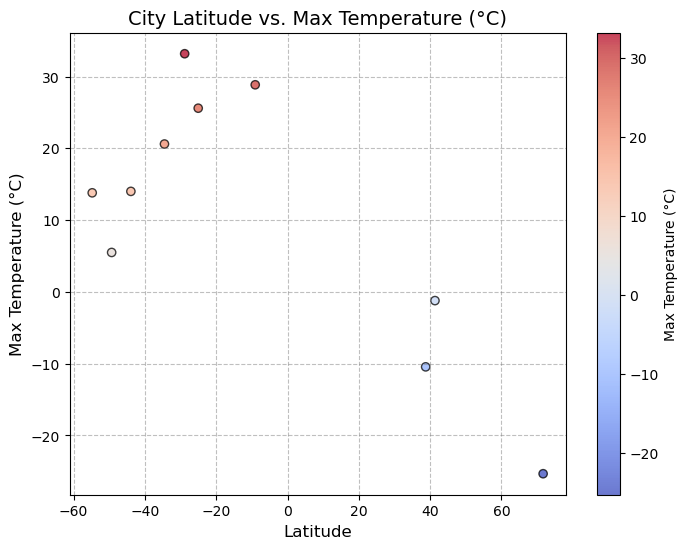

In [9]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(8, 6))  
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", alpha=0.75, c=city_data_df["Max Temp"], cmap="coolwarm")

# Set title and labels
plt.title("City Latitude vs. Max Temperature (°C)", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Max Temperature (°C)", fontsize=12)

# Customize grid style
plt.grid(True, linestyle="--", color="gray", alpha=0.5)

# Optional: Customize the tick marks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add color bar (optional)
plt.colorbar(label="Max Temperature (°C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

In [13]:
def plot_linear_regression(x, y, x_label, y_label, title, save_path=None):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regression_line = slope * x + intercept

    # Create the scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, edgecolor="black", alpha=0.75)
    plt.plot(x, regression_line, color="red", label=f"y = {slope:.2f}x + {intercept:.2f}\nR² = {rvalue**2:.2f}")
    plt.title(title, fontsize=14)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle="--", color="gray", alpha=0.5)

    # Show the plot
    plt.show()


#### Latitude Vs. Cloudiness

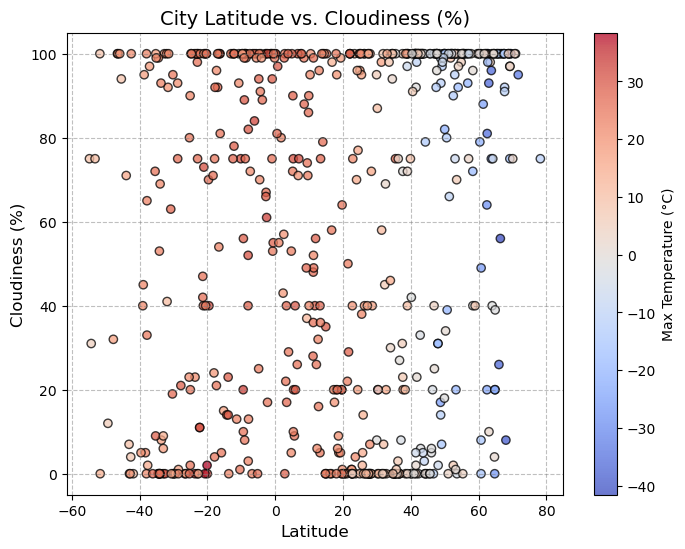

In [ ]:
plt.figure(figsize=(8, 6))

# Scatter plot
plt.scatter(
    city_data_df["Lat"], 
    city_data_df["Cloudiness"], 
    edgecolor="black", 
    alpha=0.75, 
    c=city_data_df["Max Temp"], 
    cmap="coolwarm"
)

# Set title and labels
plt.title("City Latitude vs. Cloudiness (%)", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Cloudiness (%)", fontsize=12)

# Customize grid style
plt.grid(True, linestyle="--", color="gray", alpha=0.5)

# Optional: Customize tick marks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add color bar for temperature
color_bar = plt.colorbar(label="Max Temperature (°C)")
color_bar.set_alpha(0.8)


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

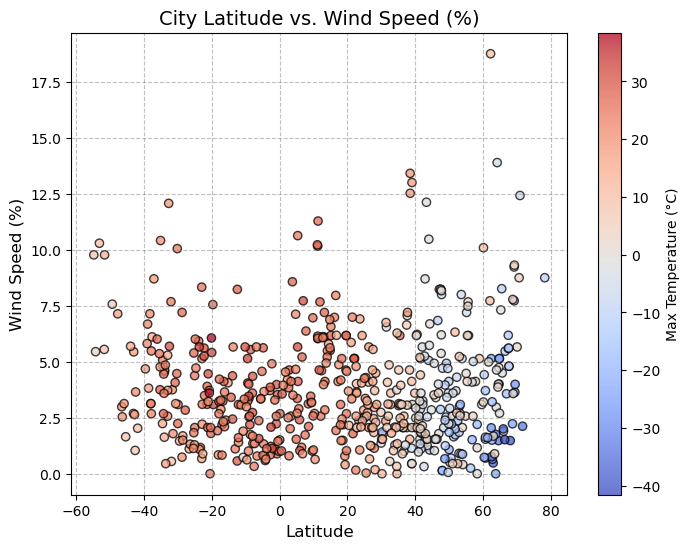

In [ ]:
plt.figure(figsize=(8, 6))

# Scatter plot
plt.scatter(
    city_data_df["Lat"], 
    city_data_df["Wind Speed"], 
    edgecolor="black", 
    alpha=0.75, 
    c=city_data_df["Max Temp"], 
    cmap="coolwarm"
)

# Set title and labels
plt.title("City Latitude vs. Wind Speed (%)", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Wind Speed (%)", fontsize=12)

# Customize grid style
plt.grid(True, linestyle="--", color="gray", alpha=0.5)

# Optional: Customize tick marks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add color bar for temperature
color_bar = plt.colorbar(label="Max Temperature (°C)")
color_bar.set_alpha(0.8)


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x, y, x_label, y_label, title, save_path=None):

    plot_linear_regression(
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    x_label="Latitude",
    y_label="Max Temperature (°C)",
    title="Linear Regression: Latitude vs. Max Temperature",
    save_path="output_data/Fig3.png"
)


In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,pyt-yakh,60.7499,72.8582,-25.64,100,49,0.70,RU,1737081586
1,khovd,48.0056,91.6419,-17.22,81,31,0.14,MN,1737081588
3,hamilton,39.1834,-84.5333,1.07,79,100,3.09,US,1737081590
5,ulety,51.3572,112.4849,-9.47,75,66,1.65,RU,1737081593
6,hovd,48.0056,91.6419,-17.22,81,31,0.14,MN,1737081594


In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,pyt-yakh,60.7499,72.8582,-25.64,100,49,0.70,RU,1737081586
1,khovd,48.0056,91.6419,-17.22,81,31,0.14,MN,1737081588
3,hamilton,39.1834,-84.5333,1.07,79,100,3.09,US,1737081590
5,ulety,51.3572,112.4849,-9.47,75,66,1.65,RU,1737081593
6,hovd,48.0056,91.6419,-17.22,81,31,0.14,MN,1737081594


###  Temperature vs. Latitude Linear Regression Plot

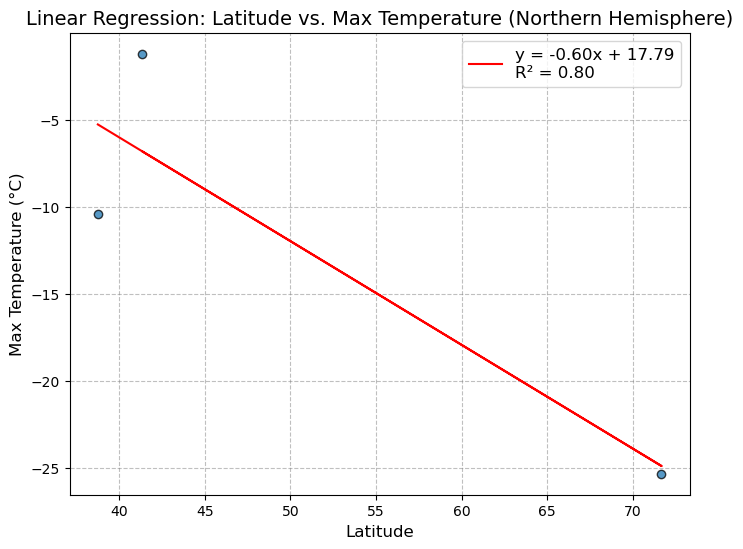

In [ ]:
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

plot_linear_regression(
    x=northern_hemi_df["Lat"],
    y=northern_hemi_df["Max Temp"],
    x_label="Latitude",
    y_label="Max Temperature (°C)",
    title="Linear Regression: Latitude vs. Max Temperature (Northern Hemisphere)",
   
)


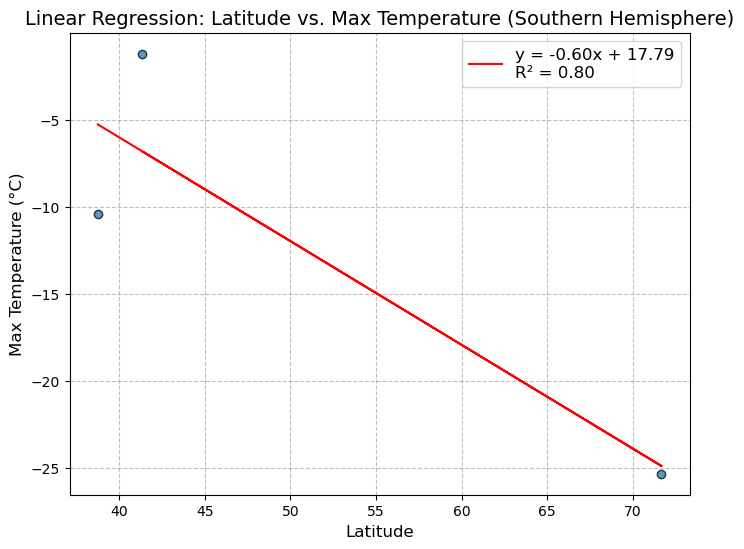

In [15]:
# Linear regression on Southern Hemisphere
southern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

plot_linear_regression(
    x=southern_hemi_df["Lat"],
    y=southern_hemi_df["Max Temp"],
    x_label="Latitude",
    y_label="Max Temperature (°C)",
    title="Linear Regression: Latitude vs. Max Temperature (Southern Hemisphere)",
    
)


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.007659599322853922


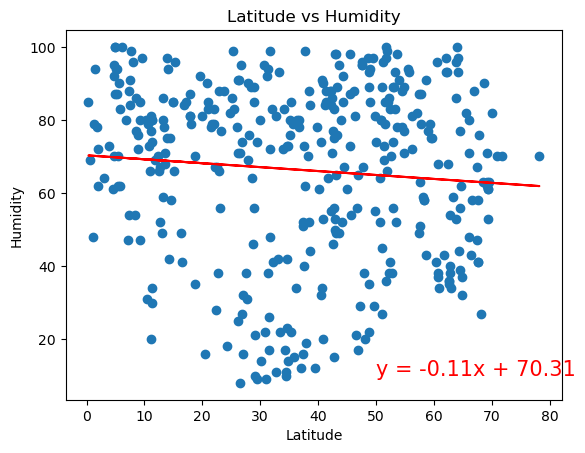

In [ ]:
# Northern Hemisphere
plot_linear_regression(
    x=northern_hemi_df["Lat"],
    y=northern_hemi_df["Humidity"],
    x_label="Latitude",
    y_label="Humidity (%)",
    title="Linear Regression: Latitude vs. Humidity (Northern Hemisphere)",
    save_path="output_data/Fig4_NH_Humidity.png"
)


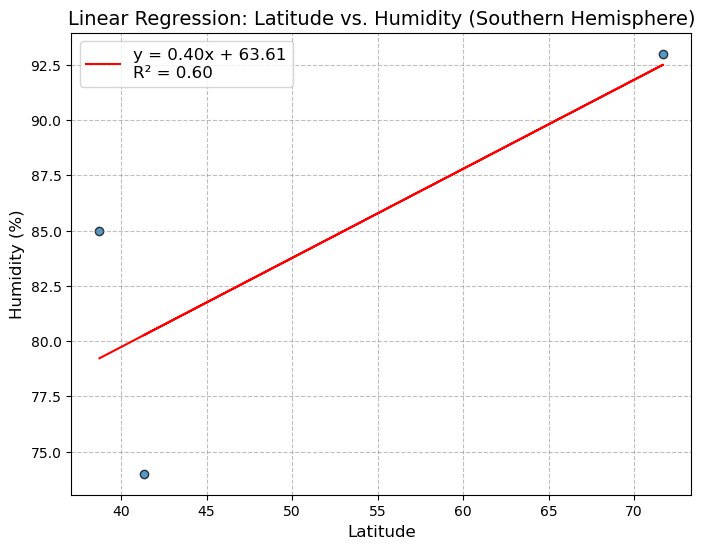

In [16]:
# Southern Hemisphere
plot_linear_regression(
    x=southern_hemi_df["Lat"],
    y=southern_hemi_df["Humidity"],
    x_label="Latitude",
    y_label="Humidity (%)",
    title="Linear Regression: Latitude vs. Humidity (Southern Hemisphere)",
    save_path="output_data/Fig4_NH_Humidity.png"
)


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.006456908379763574


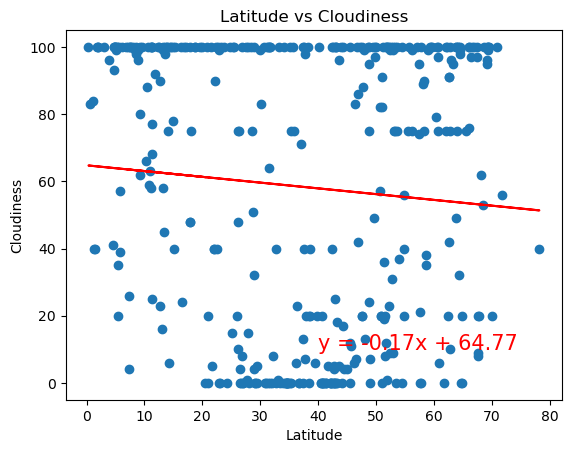

In [ ]:
# Northern Hemisphere
plot_linear_regression(
    x=northern_hemi_df["Lat"],
    y=northern_hemi_df["Cloudiness"],
    x_label="Latitude",
    y_label="Cloudiness (%)",
    title="Linear Regression: Latitude vs. Cloudiness (Northern Hemisphere)",
    save_path="output_data/Fig5_NH_Cloudiness.png"
)


The r^2-value is: 0.018616831531634456


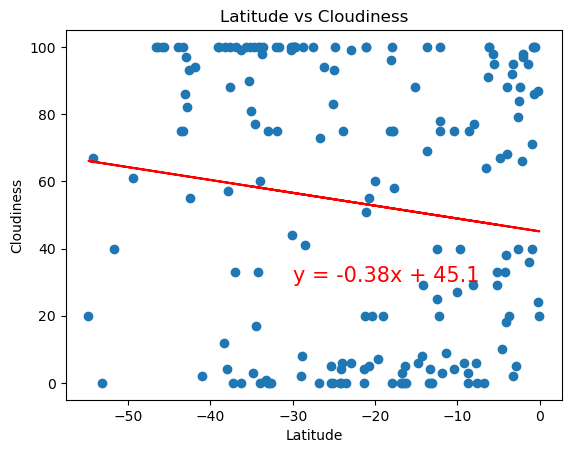

In [ ]:
# Southern Hemisphere
plot_linear_regression(
    x=southern_hemi_df["Lat"],
    y=southern_hemi_df["Cloudiness"],
    x_label="Latitude",
    y_label="Cloudiness (%)",
    title="Linear Regression: Latitude vs. Cloudiness (Southern Hemisphere)",
    save_path="output_data/Fig5_NH_Cloudiness.png"
)


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

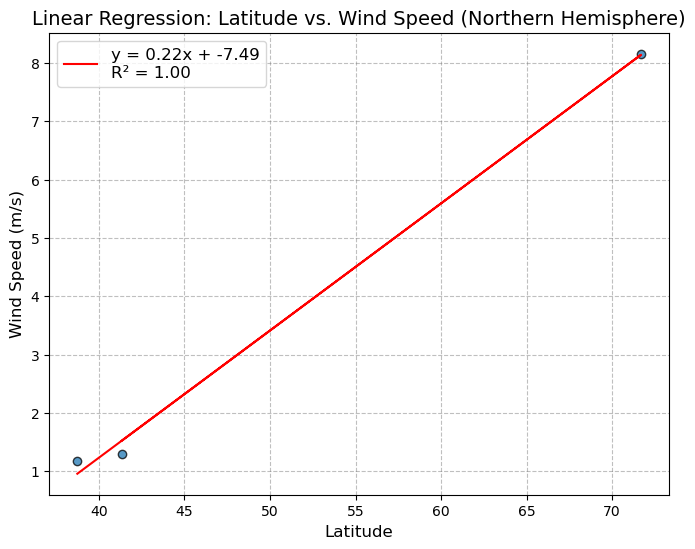

In [17]:
# Northern Hemisphere
plot_linear_regression(
    x=northern_hemi_df["Lat"],
    y=northern_hemi_df["Wind Speed"],
    x_label="Latitude",
    y_label="Wind Speed (m/s)",
    title="Linear Regression: Latitude vs. Wind Speed (Northern Hemisphere)",
    save_path="output_data/Fig6_NH_WindSpeed.png"
)


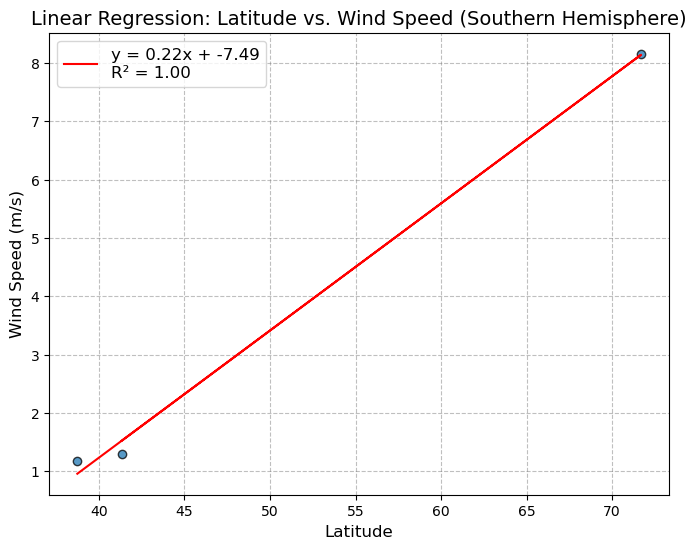

In [18]:
# Southern Hemisphere
plot_linear_regression(
    x=southern_hemi_df["Lat"],
    y=southern_hemi_df["Wind Speed"],
    x_label="Latitude",
    y_label="Wind Speed (m/s)",
    title="Linear Regression: Latitude vs. Wind Speed (Southern Hemisphere)",
    save_path="output_data/Fig6_NH_WindSpeed.png"
)


**Discussion about the linear relationship:** YOUR RESPONSE HERE